In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cgan import DGAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
symbols = ["^BVSP","VALE3.SA" ,"PETR4.SA","ITUB4.SA" ,"BBDC4.SA" ,"B3SA3.SA" ,"ABEV3.SA", "B3SA3.SA"]
tickers = yf.Tickers(symbols)

In [3]:
dataset_ = tickers.tickers['^BVSP'].history(period='2000d').iloc[:,:5]

In [4]:
def calc_var(dataset):
    var     = []
    var_max = []
    for i in range(len(dataset)):
        open = dataset['Open'][i]
        close = dataset['Close'][i]
        high = dataset['High'][i]
        low = dataset['Low'][i]

        aux = (low/high-1)*100
        var_max.append(round(aux,2))

        if open >= close:
            aux = (open/close-1)*100
            var.append(round(aux,2))
            
        else:
            aux = (close/open-1)*100
            var.append(round(aux,2))
        

    dataset['Var'] = var
    dataset['Var_max'] = var_max
    return dataset

dataset = calc_var(dataset_)


In [5]:
for i in symbols[1:]:
    aux = tickers.tickers[i].history(period='2000d')
    aux = calc_var(aux)
    dataset[i] = aux['Close']
    dataset[f'{i}_Var'] = aux['Var']
    dataset[f'{i}_Var_max'] = aux['Var_max']
dataset.head(2)

,Open,High,Low,Close,Volume,Var,Var_max,VALE3.SA,VALE3.SA_Var,VALE3.SA_Var_max,...,ITUB4.SA_Var_max,BBDC4.SA,BBDC4.SA_Var,BBDC4.SA_Var_max,B3SA3.SA,B3SA3.SA_Var,B3SA3.SA_Var_max,ABEV3.SA,ABEV3.SA_Var,ABEV3.SA_Var_max
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-08 00:00:00-02:00,40695.0,41218.0,40463.0,40612.0,3221600,0.20,-1.83,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-11 00:00:00-02:00,40612.0,40974.0,39924.0,39950.0,3086400,1.66,-2.56,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset.dtypes

Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Var                 float64
Var_max             float64
VALE3.SA            float64
VALE3.SA_Var        float64
VALE3.SA_Var_max    float64
PETR4.SA            float64
PETR4.SA_Var        float64
PETR4.SA_Var_max    float64
ITUB4.SA            float64
ITUB4.SA_Var        float64
ITUB4.SA_Var_max    float64
BBDC4.SA            float64
BBDC4.SA_Var        float64
BBDC4.SA_Var_max    float64
B3SA3.SA            float64
B3SA3.SA_Var        float64
B3SA3.SA_Var_max    float64
ABEV3.SA            float64
ABEV3.SA_Var        float64
ABEV3.SA_Var_max    float64
dtype: object

In [7]:
dataset['Volume'] = dataset['Volume'].astype(float)
dataset.isnull().sum()

Open                0
High                0
Low                 0
Close               0
Volume              0
Var                 0
Var_max             0
VALE3.SA            8
VALE3.SA_Var        8
VALE3.SA_Var_max    8
PETR4.SA            8
PETR4.SA_Var        8
PETR4.SA_Var_max    8
ITUB4.SA            8
ITUB4.SA_Var        8
ITUB4.SA_Var_max    8
BBDC4.SA            8
BBDC4.SA_Var        8
BBDC4.SA_Var_max    8
B3SA3.SA            8
B3SA3.SA_Var        8
B3SA3.SA_Var_max    8
ABEV3.SA            8
ABEV3.SA_Var        8
ABEV3.SA_Var_max    8
dtype: int64

In [8]:
dataset.dropna(inplace=True)

In [9]:
columns_outliers = []
for i in dataset:
    sum = 0
    mean = np.mean(dataset[i])
    q1,q3 = np.percentile(dataset[i], [25,75])
    amp_quartil = q3-q1
    limit_inf = q1 - (1.5 * amp_quartil)
    limit_sup = q3 + (1.5 * amp_quartil)

    for j in dataset[i]:
        if j < limit_inf or j > limit_sup:
            sum+=1
    
    print(f'Na coluna {i} foram encontrados:')
    print(f'Outliers = {sum}')
    columns_outliers.append(i)

Na coluna Open foram encontrados:
Outliers = 0
Na coluna High foram encontrados:
Outliers = 0
Na coluna Low foram encontrados:
Outliers = 0
Na coluna Close foram encontrados:
Outliers = 0
Na coluna Volume foram encontrados:
Outliers = 5
Na coluna Var foram encontrados:
Outliers = 66
Na coluna Var_max foram encontrados:
Outliers = 88
Na coluna VALE3.SA foram encontrados:
Outliers = 0
Na coluna VALE3.SA_Var foram encontrados:
Outliers = 93
Na coluna VALE3.SA_Var_max foram encontrados:
Outliers = 122
Na coluna PETR4.SA foram encontrados:
Outliers = 144
Na coluna PETR4.SA_Var foram encontrados:
Outliers = 68
Na coluna PETR4.SA_Var_max foram encontrados:
Outliers = 94
Na coluna ITUB4.SA foram encontrados:
Outliers = 15
Na coluna ITUB4.SA_Var foram encontrados:
Outliers = 72
Na coluna ITUB4.SA_Var_max foram encontrados:
Outliers = 72
Na coluna BBDC4.SA foram encontrados:
Outliers = 8
Na coluna BBDC4.SA_Var foram encontrados:
Outliers = 63
Na coluna BBDC4.SA_Var_max foram encontrados:
Outlier

In [10]:
for i in columns_outliers:
    mean = np.mean(dataset[i])
    q1,q3 = np.percentile(dataset[i], [25,75])
    amp_quartil = q3-q1
    limit_inf = q1 - (1.5 * amp_quartil)
    limit_sup = q3 + (1.5 * amp_quartil)

    for j in range(len(dataset[i])):
        if dataset[i][j] < limit_inf or dataset[i][j] > limit_sup:
            dataset[i][j] = mean


<Axes: >

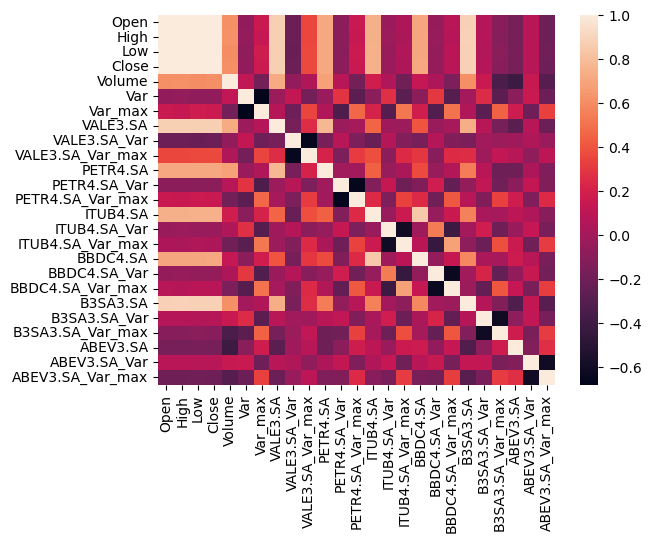

In [11]:
sns.heatmap(dataset.corr())

In [12]:
mask_inf = np.isinf(dataset)
dataset[mask_inf] = np.nan  

In [13]:
dataset.isnull().sum()

Open                0
High                0
Low                 0
Close               0
Volume              0
Var                 0
Var_max             0
VALE3.SA            0
VALE3.SA_Var        0
VALE3.SA_Var_max    0
PETR4.SA            0
PETR4.SA_Var        0
PETR4.SA_Var_max    0
ITUB4.SA            0
ITUB4.SA_Var        0
ITUB4.SA_Var_max    0
BBDC4.SA            0
BBDC4.SA_Var        0
BBDC4.SA_Var_max    0
B3SA3.SA            0
B3SA3.SA_Var        0
B3SA3.SA_Var_max    0
ABEV3.SA            0
ABEV3.SA_Var        0
ABEV3.SA_Var_max    0
dtype: int64

In [14]:
len_train = round(len(dataset)*0.8)
dataset_train = dataset.iloc[:len_train,]
dataset_test  = dataset.iloc[len_train:,]
dataset_train.shape, dataset_test.shape

((1587, 25), (397, 25))

In [15]:
dataset_test_reset = dataset_test.reset_index()

dataset_test_y = dataset_test_reset['Close'][1:]
dataset_test_y = np.array(dataset_test_y).reshape(dataset_test_y.shape[0],1)

dataset_test_x = dataset_test_reset.iloc[:,1:]
dataset_test_x = dataset_test_x.drop(dataset_test_x.index[-1])


dataset_train_reset = dataset_train.reset_index()

dataset_train_y = dataset_train_reset['Close'][1:]
dataset_train_y = np.array(dataset_train_y).reshape(dataset_train_y.shape[0],1)

dataset_train_x = dataset_train_reset.iloc[:,1:]
dataset_train_x = dataset_train_x.drop(dataset_train_x.index[-1])


dataset_test_y.shape, dataset_test_x.shape, '---', dataset_train_y.shape, dataset_train_x.shape

((396, 1), (396, 25), '---', (1586, 1), (1586, 25))

In [16]:
scaler  = MinMaxScaler(feature_range=(0, 1))
dataset_train_normalized = scaler.fit_transform(dataset_train)

scaler_test_x  = MinMaxScaler(feature_range=(0, 1))
dataset_test_normalized_x = scaler_test_x.fit_transform(dataset_test_x)

scaler_train_x  = MinMaxScaler(feature_range=(0, 1))
dataset_train_normalized_x = scaler_train_x.fit_transform(dataset_train_x)

scaler_test_y  = MinMaxScaler(feature_range=(0, 1))
dataset_test_normalized_y = scaler_test_y.fit_transform(dataset_test_y)

scaler_train_y  = MinMaxScaler(feature_range=(0, 1))
dataset_train_normalized_y = scaler_train_y.fit_transform(dataset_train_y)



In [17]:
def create_dataset(dataset,datasetY, look_back=1, vars = None):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0:vars]
		dataX.append(a)
		dataY.append(datasetY[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

vars = dataset_train_x.shape[1]
vars_y = dataset_train_y.shape[1]
look_back = 2
trainX, trainY = create_dataset(dataset_train_normalized_x,dataset_train_normalized_y, look_back,vars)
testX, testY = create_dataset(dataset_test_normalized_x,dataset_test_normalized_y, look_back, vars)

trainY = trainY.reshape((trainY.shape[0],1))
trainY_desnormalized = scaler_train_y.inverse_transform(trainY)

testY = testY.reshape((testY.shape[0],1))
testY_desnormalized = scaler_test_y.inverse_transform(testY)

In [18]:
gan = DGAN( x_treino=dataset_train_normalized, look_back = look_back, vars = vars, var_y = vars_y) # instanciando a classe


/Users/igoralves/anaconda3/envs/Py38/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [19]:
gan.train(train_steps=10000, batch_size=256) # treinando

8/8 [==============================] - 0s 588us/step


2024-01-20 15:14:39.058258: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


0: [Discriminator loss: 1.122336, acc: 0.501953]   [Adversarial loss: 1.274853, acc: 0.078125]
8/8 [==============================] - 0s 522us/step
1: [Discriminator loss: 1.130076, acc: 0.507812]   [Adversarial loss: 1.282385, acc: 0.093750]
8/8 [==============================] - 0s 515us/step
2: [Discriminator loss: 1.136151, acc: 0.494141]   [Adversarial loss: 1.273784, acc: 0.101562]
8/8 [==============================] - 0s 554us/step
3: [Discriminator loss: 1.111219, acc: 0.503906]   [Adversarial loss: 1.270662, acc: 0.082031]
8/8 [==============================] - 0s 528us/step
4: [Discriminator loss: 1.130568, acc: 0.498047]   [Adversarial loss: 1.259701, acc: 0.132812]
8/8 [==============================] - 0s 501us/step
5: [Discriminator loss: 1.093654, acc: 0.498047]   [Adversarial loss: 1.268712, acc: 0.078125]
8/8 [==============================] - 0s 492us/step
6: [Discriminator loss: 1.124889, acc: 0.498047]   [Adversarial loss: 1.266581, acc: 0.125000]
8/8 [============

In [20]:
predict_normalized_train = gan.generator.predict(trainX)
predict_normalized_teste = gan.generator.predict(testX)

predict_train = scaler_train_y.inverse_transform(predict_normalized_train)
predict_test = scaler_test_y.inverse_transform(predict_normalized_teste)

13/13 [==============================] - 0s 568us/step


In [21]:
trainScore = np.sqrt(mean_squared_error(trainY_desnormalized, predict_train))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY_desnormalized, predict_test))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 16784.08 RMSE
Test Score: 9890.37 RMSE


In [22]:
descont_test = predict_test-testScore
descont_train = predict_train-trainScore

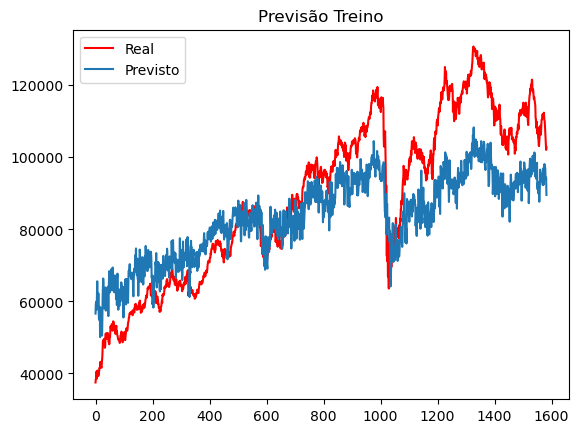

In [23]:
plt.title('Previsão Treino')
plt.plot(trainY_desnormalized, color='red',label="Real")
plt.plot(descont_train, label="Previsto")
plt.legend()
plt.show()

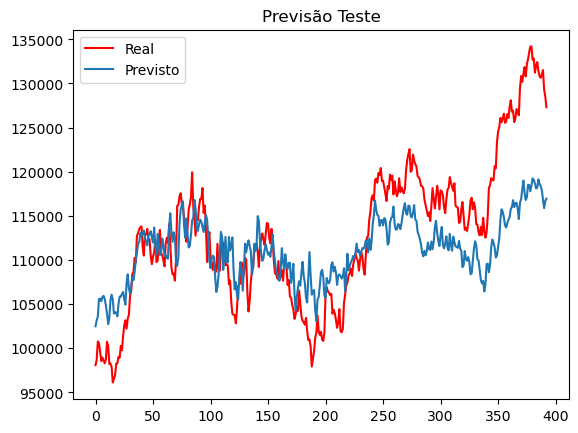

In [24]:
plt.title('Previsão Teste')
plt.plot(testY_desnormalized,color='red', label="Real")
plt.plot(descont_test, label="Previsto")
plt.legend()
plt.show()

In [25]:
import statsmodels.api as sm

X = sm.add_constant(testY_desnormalized)
modelo = sm.OLS(predict_test, X).fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     1046.
Date:                Sat, 20 Jan 2024   Prob (F-statistic):          1.55e-112
Time:                        15:23:56   Log-Likelihood:                -3511.1
No. Observations:                 393   AIC:                             7026.
Df Residuals:                     391   BIC:                             7034.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.017e+04   1267.638     63.246      0.0

ADF Test p-value: 0.01863222209960769


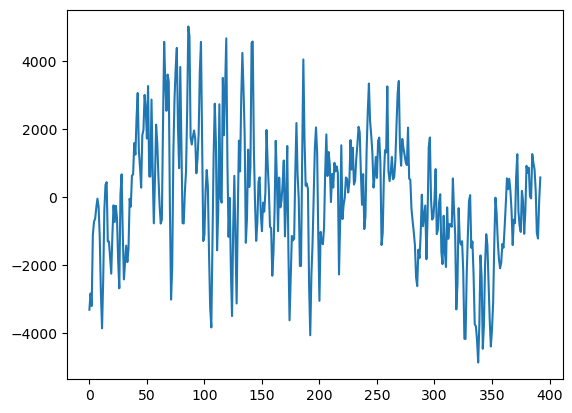

In [26]:
resids = modelo.resid
adf_test_result = sm.tsa.adfuller(resids)
print("ADF Test p-value:", adf_test_result[1])
plt.plot(resids)